<a href="https://colab.research.google.com/github/ayyanzia/DiabetesPrediction/blob/main/DiabetesFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
#Project Starting
```



## **Importing Necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #confusion matrix #bar chart
import seaborn as sns
import joblib


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, classification_report
)
#evaluation metrics to determine how good program is
from sklearn.cluster import KMeans  #unsuperVised learning

##Load and Clean Data

###Mounting Data csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Read Data from drive

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasetColab/diabetes_012_health_indicators_BRFSS2015.csv")
df=df.drop(columns=["Unnamed: 0"],errors='ignore')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


###Fills in missing values

In [ ]:
df.iloc[:, :] =SimpleImputer(strategy='mean').fit_transform(df)

##Feature Selection

In [ ]:
features =["BMI", "HighBP","HighChol","HeartDiseaseorAttack","PhysHlth", "Smoker", "PhysActivity","Age","Sex" ]
X=df[features]
y=df["Diabetes_012"]
#selecting important symptoms to find out about the patient

###K Means CLustering

In [ ]:
kmeans =KMeans(n_clusters=2,random_state=42)
df["Cluster"]= kmeans.fit_predict(X)
X["Cluster"]=df["Cluster"]

#clustering into either diabetic or non-diabetic patients

<ipython-input-10-3920801f7b3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=df["Cluster"]


##Splitting data into X and Y values

In [ ]:
X_train, X_test,y_train, y_test,=train_test_split(X,y, test_size=0.2,random_state=42)

#ffrom sklearn.model_selection
#X having independent values y has values for depenedent and size 0.2 cuz we will use 20% of total data for testing
#random 42 to split data in same way every time the code is run

##Train Decision Tree

### Epochs

In [ ]:
best_accuracy=0
best_model=None
accuracies=[]

for epoch in range(1,70):
  X_train_epoch, X_test_epoch, y_train_epoch, y_test_epoch = train_test_split(
        X, y, test_size=0.2, random_state=epoch, shuffle=True)

#for standardizing data so no feature gets nerfed; to scale for epochs
  scaler=StandardScaler()
  X_train_scaled=scaler.fit_transform(X_train_epoch)
  X_test_scaled=scaler.transform(X_test_epoch)


  dt_model=DecisionTreeClassifier(max_depth =5,random_state=epoch)
  dt_model.fit(X_train_scaled,y_train_epoch)

  y_pred =dt_model.predict(X_test_scaled)
  acc=accuracy_score(y_test_epoch,y_pred)
  print(f"Epoch {epoch}: Accuracy={acc:.4f}")
  accuracies.append(acc)

  if acc>best_accuracy:
    best_accuracy=acc
    best_model=dt_model
    best_scaler=scaler

Epoch 1: Accuracy=0.8455
Epoch 2: Accuracy=0.8446
Epoch 3: Accuracy=0.8451
Epoch 4: Accuracy=0.8439
Epoch 5: Accuracy=0.8459
Epoch 6: Accuracy=0.8457
Epoch 7: Accuracy=0.8436
Epoch 8: Accuracy=0.8456
Epoch 9: Accuracy=0.8448
Epoch 10: Accuracy=0.8416
Epoch 11: Accuracy=0.8422
Epoch 12: Accuracy=0.8440
Epoch 13: Accuracy=0.8454
Epoch 14: Accuracy=0.8443
Epoch 15: Accuracy=0.8417
Epoch 16: Accuracy=0.8458
Epoch 17: Accuracy=0.8440
Epoch 18: Accuracy=0.8433
Epoch 19: Accuracy=0.8448
Epoch 20: Accuracy=0.8441
Epoch 21: Accuracy=0.8435
Epoch 22: Accuracy=0.8439
Epoch 23: Accuracy=0.8469
Epoch 24: Accuracy=0.8470
Epoch 25: Accuracy=0.8440
Epoch 26: Accuracy=0.8454
Epoch 27: Accuracy=0.8442
Epoch 28: Accuracy=0.8484
Epoch 29: Accuracy=0.8453
Epoch 30: Accuracy=0.8462
Epoch 31: Accuracy=0.8455
Epoch 32: Accuracy=0.8449
Epoch 33: Accuracy=0.8446
Epoch 34: Accuracy=0.8456
Epoch 35: Accuracy=0.8461
Epoch 36: Accuracy=0.8452
Epoch 37: Accuracy=0.8454
Epoch 38: Accuracy=0.8451
Epoch 39: Accuracy=0.

In [ ]:
# dt_model=DecisionTreeClassifier(max_depth =5,random_state=42)
# dt_model.fit(X_train,y_train)

###Evaluation

In [ ]:
y_pred=dt_model.predict(X_test)
y_proba=dt_model.predict_proba(X_test)[:,1]

#prediction and probablity for like te4st sample

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


###Prediction

In [ ]:
y_pred = dt_model.predict(X_test)
y_proba = dt_model.predict_proba(X_test)  #Probabilities for all classes

#evaluates results by comparing predicted with actual

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


###Display

In [ ]:
print("Evaluation Metrices:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
#print(f"AUC: {auc:.2f}")
print("\n Complete Classification Report is as follows:")
print(classification_report(y_test, y_pred))

Evaluation Metrices:
Accuracy: 0.82
Precision: 0.79
Recall: 0.82
F1 Score: 0.80

 Complete Classification Report is as follows:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.36      0.32      0.34      6997

    accuracy                           0.82     50736
   macro avg       0.41      0.41      0.41     50736
weighted avg       0.79      0.82      0.80     50736



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Graphs

###HeatMap

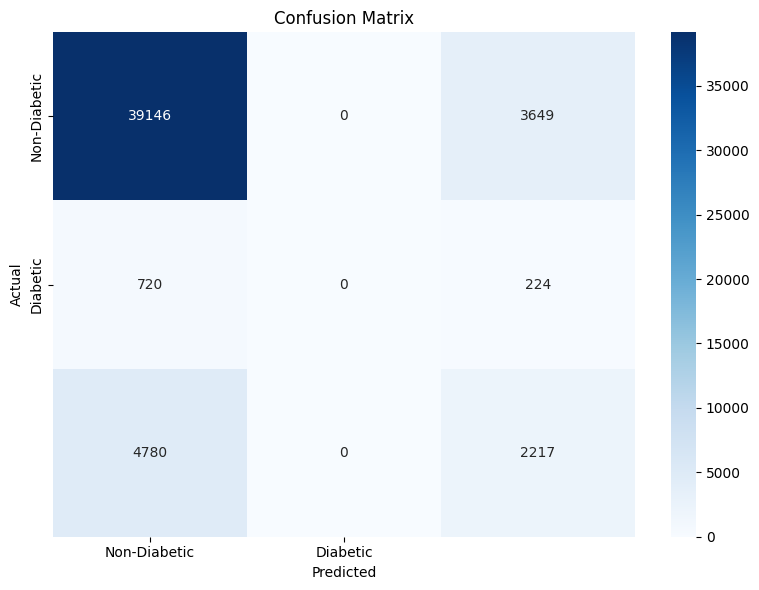

In [ ]:
cm =confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()  #to prevent overlapping
plt.show()

#sklearn.metrics
#8width and 6 height
#ytest has actual valus and yPred has predicted values, cm calculates confusion matrix

###Accuracy Vs Epoch Graph

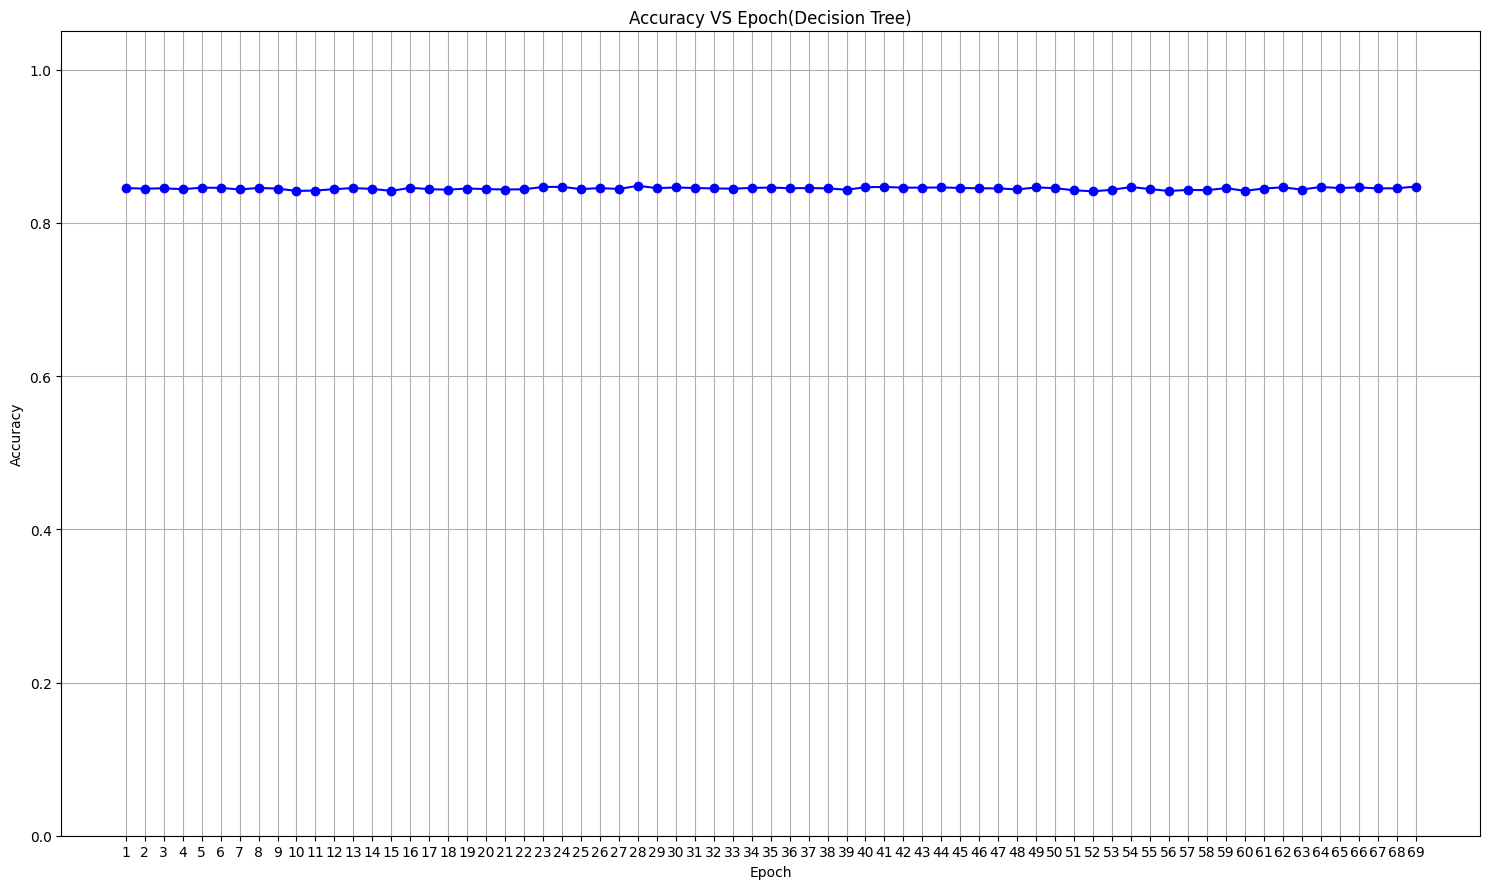

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(range(1,70),accuracies, marker='o',linestyle='-',color='b')
plt.title("Accuracy VS Epoch(Decision Tree)")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.title('Accuracy vs Epoch')
plt.xticks(range(1,70))
plt.ylim(0,1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

###Bar Graph

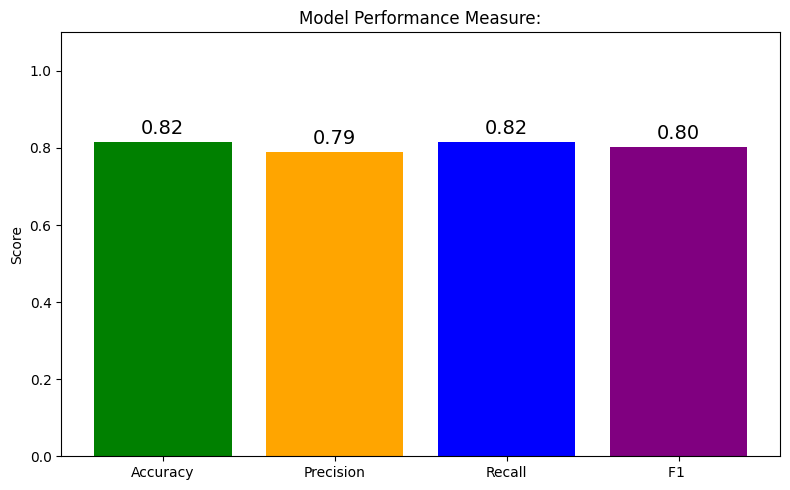

In [ ]:
metrics =['Accuracy', 'Precision', 'Recall', 'F1 ']
values = [accuracy, precision, recall, f1]
plt.figure(figsize=(8,5))
bars =plt.bar(metrics, values, color=['green', 'orange', 'blue', 'purple'])

for bar in bars:
  height = bar.get_height()
  plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=14)

plt.ylim(0,1.1)
plt.title('Model Performance Measure:')
plt.ylabel('Score')
plt.tight_layout()
plt.show()



##Saving Model

In [ ]:
joblib.dump(dt_model,"decision_tree.pkl")
joblib.dump(scaler,"scaler.pkl")


['scaler.pkl']

In [ ]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


##Taking Live input